In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [3]:
model = pickle.load(open('lin_model.pkl', 'rb'))
scaler_input = pickle.load(open('scaler_input.pkl', 'rb'))
scaler_output = pickle.load(open('scaler_output.pkl', 'rb'))

In [7]:
df = pd.read_csv('Amreli NRM data for model building final.csv')
campaign = np.unique(df['campaign'])

for c in campaign:
    dfc = df[df['campaign']==c]
    i = dfc.index[0]
    df = df.drop(i)
    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

threshold = 150

for i in range(df.shape[0]):
    if(df.loc[i,'Total Heat Time previous (minutes)']>threshold):
        df.loc[i,'Total Heat Time previous (minutes)']= threshold
    if(df.loc[i,'Total Heat Time (minutes)']>threshold):
        df.loc[i,'Total Heat Time (minutes)']= threshold
        
df['Input energy previous (KWH)'] = df['Power previous']*df['Total Heat Time previous (minutes)']/60
df['Input energy (KWH)'] = df['Power']*df['Total Heat Time (minutes)']/60

df1 = df[df['campaign']==8]

In [8]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage','Previous Frequency','Refractory lining before heating','Number of capacitors removed','Tapping Temperature (C)']
output_columns = ['Voltage','Frequency','Refractory lining after heating']
X = df1[input_columns].values
y = df1[output_columns].values
Store_Result = {}
k = 0
for i in range(df1.shape[0]):
    if(i==0):
        X_s = scaler_input.transform(X[i,:].reshape(1,len(X[i,:])))
        y_s = scaler_output.transform(y)
        y_p = model.predict(X_s)
        y_pred = scaler_output.inverse_transform(y_p)
        dic = {}
        dic['Pred Voltage'] = y_pred[0][0]
        dic['Pred Frequency'] = y_pred[0][1]
        dic['Pred Refractory'] = y_pred[0][2]
        dic['Actual Voltage'] = y[i,0]
        dic['Actual Frequency'] = y[i,1]
        dic['Actual Refractory'] = y[i,2]
        Store_Result[k] = dic
        k = k+1
    else:
        X[i,4] = Store_Result[k-1]['Pred Voltage']
        X[i,5] = Store_Result[k-1]['Pred Frequency']
        X[i,6] = Store_Result[k-1]['Pred Refractory']

        X_s = scaler_input.transform(X[i,:].reshape(1,len(X[i,:])))
        y_s = scaler_output.transform(y)
        
        y_p = model.predict(X_s)
        y_pred = scaler_output.inverse_transform(y_p)
        dic = {}
        dic['Pred Voltage'] = y_pred[0][0]
        dic['Pred Frequency'] = y_pred[0][1]
        dic['Pred Refractory'] = y_pred[0][2]
        dic['Actual Voltage'] = y[i,0]
        dic['Actual Frequency'] = y[i,1]
        dic['Actual Refractory'] = y[i,2]
        
        Store_Result[k] = dic
        k = k+1

In [9]:
y_pred

array([[3.30477342e+03, 3.51053679e+02, 3.24654834e+00]])

In [10]:
Pred = np.zeros((df1.shape[0],3))
Act = np.zeros((df1.shape[0],3))

for i in range(df1.shape[0]):
    Pred[i,0] = Store_Result[i]['Pred Voltage']
    Pred[i,1] = Store_Result[i]['Pred Frequency']
    Pred[i,2] = Store_Result[i]['Pred Refractory']
    
    Act[i,0] = Store_Result[i]['Actual Voltage']
    Act[i,1] = Store_Result[i]['Actual Frequency']
    Act[i,2] = Store_Result[i]['Actual Refractory']
    

    

In [11]:
Pred

array([[3.77494397e+03, 2.58856644e+02, 6.64414906e+00],
       [3.79520416e+03, 2.60446459e+02, 6.58328352e+00],
       [3.79970380e+03, 2.61369200e+02, 6.52310126e+00],
       [3.80416234e+03, 2.61390569e+02, 6.46267675e+00],
       [3.79338336e+03, 2.62531463e+02, 6.40422358e+00],
       [3.78739588e+03, 2.63397478e+02, 6.34363072e+00],
       [3.77401608e+03, 2.64355527e+02, 6.28362428e+00],
       [3.76735983e+03, 2.64472601e+02, 6.22316042e+00],
       [3.75914907e+03, 2.64697862e+02, 6.16308468e+00],
       [3.76240740e+03, 2.61688800e+02, 6.10517536e+00],
       [3.75084139e+03, 2.63204915e+02, 6.04797200e+00],
       [3.74649265e+03, 2.62499614e+02, 5.99127469e+00],
       [3.73983914e+03, 2.62477556e+02, 5.93528678e+00],
       [3.72627408e+03, 2.64032571e+02, 5.87897141e+00],
       [3.70383490e+03, 2.67665249e+02, 5.82137494e+00],
       [3.68279360e+03, 2.69138256e+02, 5.76248346e+00],
       [3.66722700e+03, 2.68795113e+02, 5.70393964e+00],
       [3.66159051e+03, 2.65129

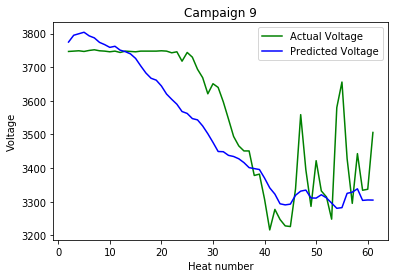

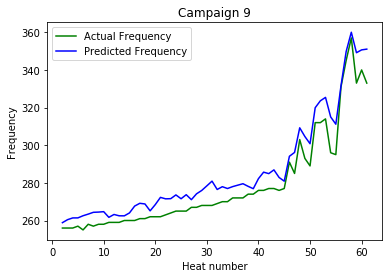

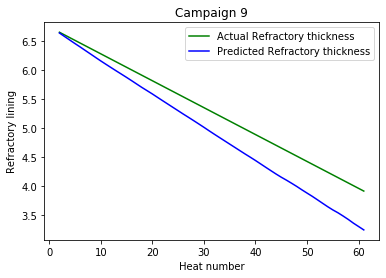

In [12]:
end = df1.shape[0]+2 # for campaign 9
# end = 62 # for campaign 8
plt.plot(range(2,end),Act[:,0],c='g');
plt.plot(range(2,end),Pred[:,0],c='b');
plt.xlabel('Heat number')
plt.ylabel('Voltage')
plt.title('Campaign 9')
plt.legend(['Actual Voltage','Predicted Voltage'])
plt.show()
plt.plot(range(2,end),Act[:,1],c='g');
plt.plot(range(2,end),Pred[:,1],c='b');
plt.xlabel('Heat number')
plt.ylabel('Frequency')
plt.legend(['Actual Frequency','Predicted Frequency'])
plt.title('Campaign 9')
plt.show()
plt.plot(range(2,end),Act[:,2],c='g');
plt.plot(range(2,end),Pred[:,2],c='b');
plt.xlabel('Heat number')
plt.ylabel('Refractory lining')
plt.legend(['Actual Refractory thickness','Predicted Refractory thickness'])
plt.title('Campaign 9')
plt.show()

In [13]:
for i in range(3):
    print(output_columns[i])
    print("MSE score is {}".format(mean_squared_error(Act[:,i], Pred[:,i])))
    print("R2 score is {}".format(r2_score(Act[:,i], Pred[:,i])))
    print("NMSE score is {}".format(np.sum(np.square(Act[:,i]- Pred[:,i]))/np.sum(np.square(Act[:,i]-np.mean(Act[:,i])))*100))

Voltage
MSE score is 12649.215355097042
R2 score is 0.6535781087042001
NMSE score is 34.64218912957999
Frequency
MSE score is 70.92447198217538
R2 score is 0.8884138907730972
NMSE score is 11.15861092269028
Refractory lining after heating
MSE score is 0.15899599896924285
R2 score is 0.7542746143023971
NMSE score is 24.57253856976029


In [14]:
Pred

array([[3.77494397e+03, 2.58856644e+02, 6.64414906e+00],
       [3.79520416e+03, 2.60446459e+02, 6.58328352e+00],
       [3.79970380e+03, 2.61369200e+02, 6.52310126e+00],
       [3.80416234e+03, 2.61390569e+02, 6.46267675e+00],
       [3.79338336e+03, 2.62531463e+02, 6.40422358e+00],
       [3.78739588e+03, 2.63397478e+02, 6.34363072e+00],
       [3.77401608e+03, 2.64355527e+02, 6.28362428e+00],
       [3.76735983e+03, 2.64472601e+02, 6.22316042e+00],
       [3.75914907e+03, 2.64697862e+02, 6.16308468e+00],
       [3.76240740e+03, 2.61688800e+02, 6.10517536e+00],
       [3.75084139e+03, 2.63204915e+02, 6.04797200e+00],
       [3.74649265e+03, 2.62499614e+02, 5.99127469e+00],
       [3.73983914e+03, 2.62477556e+02, 5.93528678e+00],
       [3.72627408e+03, 2.64032571e+02, 5.87897141e+00],
       [3.70383490e+03, 2.67665249e+02, 5.82137494e+00],
       [3.68279360e+03, 2.69138256e+02, 5.76248346e+00],
       [3.66722700e+03, 2.68795113e+02, 5.70393964e+00],
       [3.66159051e+03, 2.65129